# Text Analysis(Topic Modeling):

Data loaded and cleaned.
Top Keywords:
       keyword          score
15      stocks  120048.420657
7       market   83037.704493
14      shares   77559.971297
4     earnings   75181.331827
18          vs   65464.128259
12     reports   64127.172118
17      update   63627.866238
1     benzinga   62142.509181
5          eps   61187.454960
0    announces   55964.729030
19        week   55357.341471
6          est   53595.025097
10          pt   50750.846783
3   downgrades   49541.715976
9        price   48214.325506
2          buy   47506.387748
13       sales   46230.892980
16     trading   43668.171643
8          mid   42797.117879
11      raises   39975.413665


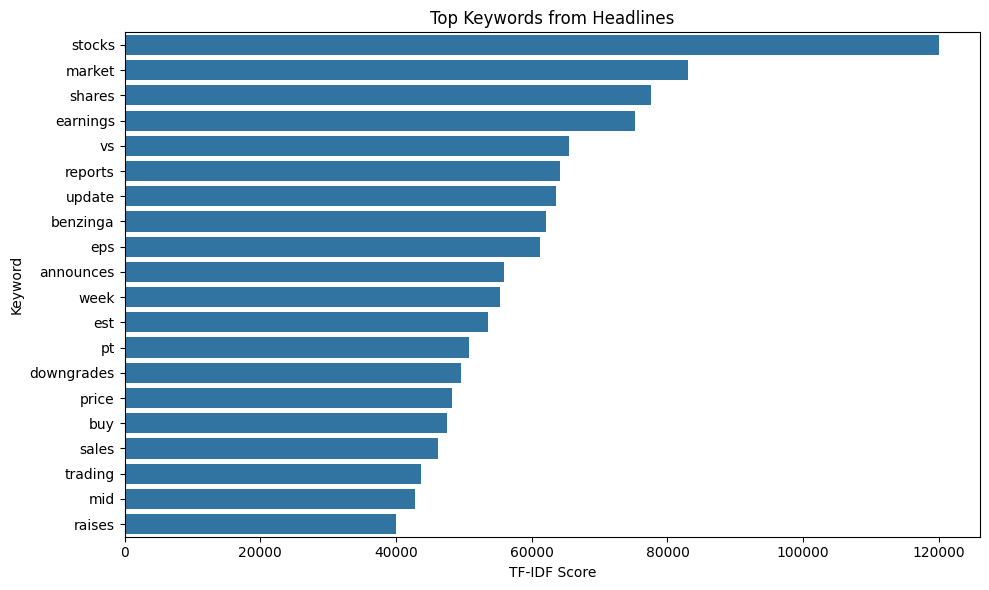

In [1]:
import sys
import os
# Path to your src folder
src_path = os.path.abspath("../src")  
sys.path.append(src_path)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer


# File path
file_path = r"C:\Users\gasha\OneDrive - Wollo University\Desktop\10Academy AIM 8\week 1\Nova-Financial-Solutions-Week1\data\raw_analyst_ratings.csv"
# Load the dataset
df = pd.read_csv(file_path)
df.dropna(subset=['headline', 'date'], inplace=True)
print("Data loaded and cleaned.")


# Topic Modeling and Keyword Extraction
# This notebook identifies common keywords and phrases from financial news headlines using NLP techniques.

# Clean Data 
df.dropna(subset=['headline'], inplace=True)

# Preprocess Headlines 
headlines = df['headline'].str.lower()

# TF-IDF Keyword Extraction 
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(headlines)

# Get top keywords
keywords = vectorizer.get_feature_names_out()
scores = X.sum(axis=0).A1
keyword_df = pd.DataFrame({'keyword': keywords, 'score': scores}).sort_values(by='score', ascending=False)

print("Top Keywords:")
print(keyword_df)

# Visualize Top Keywords 
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='keyword', data=keyword_df)
plt.title('Top Keywords from Headlines')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()
